In [86]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('data/clean_stop_data.csv')

In [88]:
df.head()

,year,month,day,hour,citizen_race,citizen_gender,citizen_age,officer_race,officer_gender,division,beat,violation,frisked,searched,citation_issued,date,time,lat,lng
0,2015.0,1.0,1.0,22.0,white,male,53.0,Asian,female,6TH DIVISION,BEAT 1,FAIL OF NON-OWNER/OPER TO MAINTAIN REQ INS/SEC...,0,0,1,2015-01-01,22:39:00,38.210850,-85.740058
1,2015.0,1.0,2.0,16.0,white,male,NaN,Asian,female,6TH DIVISION,BEAT 5,NaN,0,0,1,2015-01-02,16:42:00,38.203829,-85.665319
2,2015.0,1.0,2.0,20.0,Black,female,NaN,Asian,female,6TH DIVISION,BEAT 5,NaN,0,0,0,2015-01-02,20:00:00,38.205311,-85.650115
3,2015.0,1.0,2.0,20.0,Black,male,24.0,Asian,female,6TH DIVISION,BEAT 5,OPERATING ON SUSPENDED/REVOKED OPERATORS LICEN...,0,1,1,2015-01-02,20:35:00,38.202592,-85.654212
4,2015.0,1.0,11.0,17.0,Black,male,24.0,Asian,female,6TH DIVISION,BEAT 2,NO OR EXPIRED REGISTRATION PLATES|FAILURE OF O...,0,0,1,2015-01-11,17:20:00,38.156730,-85.696997


In [89]:
overview = df.groupby('citizen_race').aggregate(np.sum)[['frisked', 'searched', 'citation_issued']]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110960 entries, 0 to 110959
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             110959 non-null  float64
 1   month            110959 non-null  float64
 2   day              110959 non-null  float64
 3   hour             110926 non-null  float64
 4   citizen_race     110048 non-null  object 
 5   citizen_gender   110924 non-null  object 
 6   citizen_age      81283 non-null   float64
 7   officer_race     110804 non-null  object 
 8   officer_gender   110804 non-null  object 
 9   division         106767 non-null  object 
 10  beat             106817 non-null  object 
 11  violation        81300 non-null   object 
 12  frisked          110960 non-null  int64  
 13  searched         110960 non-null  int64  
 14  citation_issued  110960 non-null  int64  
 15  date             110959 non-null  object 
 16  time             110926 non-null  obje

In [91]:
stops = pd.Series(df.citizen_race.value_counts())
overview['stops'] = stops
overview = overview[['stops', 'searched', 'frisked', 'citation_issued']]
overview['pop'] = pd.Series({'Black': 171781, 'white': 546872, 'Native American': 1302, 'Asian': 22829, 'Latino': 45355})

In [92]:
overview['% ethnicity frisked'] = ((overview['frisked'] / overview['stops']) * 100).round(2)
overview['% ethnicity searched'] = ((overview['searched'] / overview['stops']) * 100).round(2)
overview['% ethnicity cited'] = ((overview['citation_issued'] / overview['stops']) * 100).round(2)
overview['% of population'] = ((overview['pop'] / 766000) * 100).round(2)
overview['% of all stops'] = ((overview['stops'] / df.year.count()) * 100).round(2)
overview['% of all searches'] = ((overview['searched'] / df.searched.sum()) * 100).round(2)
overview['% of all citations'] = ((overview['citation_issued'] / df.citation_issued.sum()) * 100).round(2)

In [93]:
overview

,stops,searched,frisked,citation_issued,pop,% ethnicity frisked,% ethnicity searched,% ethnicity cited,% of population,% of all stops,% of all searches,% of all citations
citizen_race,,,,,,,,,,,,
Asian,411,25,0,60,22829.0,0.00,6.08,14.60,2.98,0.37,0.36,0.07
Black,34943,3125,9,23494,171781.0,0.03,8.94,67.24,22.43,31.49,45.38,28.60
Latino,4843,254,0,3536,45355.0,0.00,5.24,73.01,5.92,4.36,3.69,4.30
Middle Eastern,444,38,0,57,NaN,0.00,8.56,12.84,NaN,0.40,0.55,0.07
Native American,65,2,0,50,1302.0,0.00,3.08,76.92,0.17,0.06,0.03,0.06
Unknown,2,0,0,2,NaN,0.00,0.00,100.00,NaN,0.00,0.00,0.00
white,69340,3435,7,54073,546872.0,0.01,4.95,77.98,71.39,62.49,49.88,65.81


In [94]:
pct_pop = [overview.loc['Asian', '% of population'], overview.loc['Black', '% of population'], overview.loc['Latino', '% of population'], overview.loc['white', '% of population']]
pct_all_stops = [overview.loc['Asian', '% of all stops'], overview.loc['Black', '% of all stops'], overview.loc['Latino', '% of all stops'], overview.loc['white', '% of all stops']]
pct_all_searches = [overview.loc['Asian', '% of all searches'], overview.loc['Black', '% of all searches'], overview.loc['Latino', '% of all searches'], overview.loc['white', '% of all searches']]             
pct_all_citations = [overview.loc['Asian', '% of all citations'], overview.loc['Black', '% of all citations'], overview.loc['Latino', '% of all citations'], overview.loc['white', '% of all citations']]

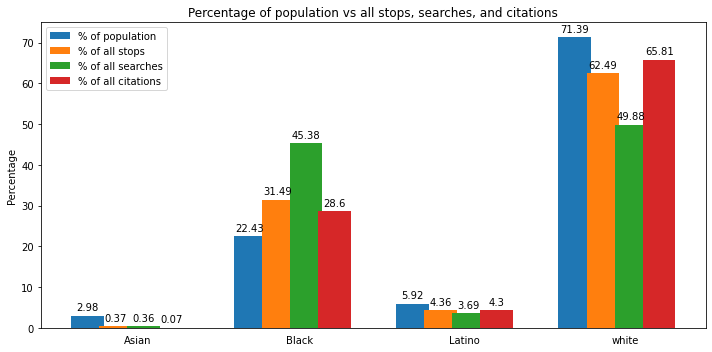

In [157]:
labels = ['Asian', 'Black', 'Latino', 'white']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.52

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x, pct_pop, width, label='% of population')
rects2 = ax.bar(x + spacing/3, pct_all_stops, width, label='% of all stops')
rects3 = ax.bar(x + (2*spacing)/3, pct_all_searches, width, label='% of all searches')
rects4 = ax.bar(x + spacing, pct_all_citations, width, label='% of all citations')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of population vs all stops, searches, and citations')
ax.set_xticks(x + .225)
ax.set_xticklabels(labels)
ax.tick_params(bottom=False)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
ax.legend()



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

#fig.tight_layout(w_pad=2)
fig.tight_layout()
plt.show()

In [96]:
overview.head(10)

,stops,searched,frisked,citation_issued,pop,% ethnicity frisked,% ethnicity searched,% ethnicity cited,% of population,% of all stops,% of all searches,% of all citations
citizen_race,,,,,,,,,,,,
Asian,411,25,0,60,22829.0,0.00,6.08,14.60,2.98,0.37,0.36,0.07
Black,34943,3125,9,23494,171781.0,0.03,8.94,67.24,22.43,31.49,45.38,28.60
Latino,4843,254,0,3536,45355.0,0.00,5.24,73.01,5.92,4.36,3.69,4.30
Middle Eastern,444,38,0,57,NaN,0.00,8.56,12.84,NaN,0.40,0.55,0.07
Native American,65,2,0,50,1302.0,0.00,3.08,76.92,0.17,0.06,0.03,0.06
Unknown,2,0,0,2,NaN,0.00,0.00,100.00,NaN,0.00,0.00,0.00
white,69340,3435,7,54073,546872.0,0.01,4.95,77.98,71.39,62.49,49.88,65.81


In [97]:
pct_Asian = [overview.loc['Asian', '% ethnicity searched'], overview.loc['Asian', '% ethnicity cited']]
pct_Black = [overview.loc['Black', '% ethnicity searched'], overview.loc['Black', '% ethnicity cited']]
pct_Latino = [overview.loc['Latino', '% ethnicity searched'], overview.loc['Latino', '% ethnicity cited']]
pct_white = [overview.loc['white', '% ethnicity searched'], overview.loc['white', '% ethnicity cited']]

In [98]:
# pct_ethnicity_searched = [overview.loc['Asian', '% ethnicity searched'], overview.loc['Black', '% ethnicity searched'], overview.loc['Latino', '% ethnicity searched'], overview.loc['white', '% ethnicity searched']]
# pct_ethnicity_cited = [overview.loc['Asian', '% ethnicity cited'], overview.loc['Black', '% ethnicity cited'], overview.loc['Latino', '% ethnicity cited'], overview.loc['white', '% ethnicity cited']]

In [149]:
pct_Asian

[6.08, 14.6]

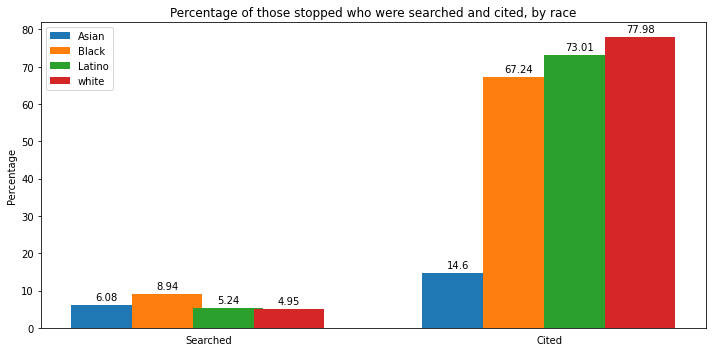

In [177]:
labels = ['Searched', 'Cited']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.52

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x, pct_Asian, width, label='Asian')
rects2 = ax.bar(x + spacing/3, pct_Black, width, label='Black')
rects3 = ax.bar(x + (2*spacing)/3, pct_Latino, width, label='Latino')
rects4 = ax.bar(x + spacing, pct_white, width, label='white')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of those stopped who were searched and cited, by race')
ax.set_xticks(x + .225)
ax.set_xticklabels(labels)
ax.tick_params(bottom=False)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

#fig.tight_layout(w_pad=2)
fig.tight_layout()
plt.show()

In [100]:
overview_3 = df.groupby(['officer_race', 'citizen_race']).aggregate(np.sum)[['frisked', 'searched', 'citation_issued']]

In [101]:
overview_3['stops'] = df.groupby(['officer_race', 'citizen_race'])['year'].count()

In [102]:
overview_3['% frisked'] = overview_3['frisked'] / overview_3['stops']
overview_3['% searched'] = overview_3['searched'] / overview_3['stops']
overview_3['% cited'] = overview_3['citation_issued'] / overview_3['stops']

In [103]:
overview_3

frisked  searched  citation_issued  stops  \
officer_race citizen_race                                                 
Asian        Asian                  0         0                0      7   
             Black                  0        77              255    565   
             Latino                 0         8               37     74   
             Middle Eastern         0         0                0      2   
             white                  0        74              330    764   
Black        Asian                  0         1                3     46   
             Black                  2       383             5124   6733   
             Latino                 0        13              686    800   
             Middle Eastern         0         4                9     84   
             Native American        0         0               13     16   
             Unknown                0         0                1      1   
             white                  0       399            11919  13663   
Latino       Asian                  0         0                0     11   
             Black                  0        48               79    279   
             Latino                 0        10               20     54   
             Middle Eastern         0         1                1     11   
             white                  0        77              126    368   
Other        Black                  0         1                6     19   
             Latino                 0         0                0      2   
             Middle Eastern         0         0                0      1   
             white                  0         1                3     21   
white        Asian                  0        24               57    344   
             Black                  7      2605            18015  27285   
             Latino                 0       218             2793   3904   
             Middle Eastern         0        33               47    345   
             Native American        0         2               37     49   
             Unknown                0         0                1      1   
             white                  7      2878            41683  54446   

                              % frisked  % searched   % cited  
officer_race citizen_race                                      
Asian        Asian             0.000000    0.000000  0.000000  
             Black             0.000000    0.136283  0.451327  
             Latino            0.000000    0.108108  0.500000  
             Middle Eastern    0.000000    0.000000  0.000000  
             white             0.000000    0.096859  0.431937  
Black        Asian             0.000000    0.021739  0.065217  
             Black             0.000297    0.056884  0.761028  
             Latino            0.000000    0.016250  0.857500  
             Middle Eastern    0.000000    0.047619  0.107143  
             Native American   0.000000    0.000000  0.812500  
             Unknown           0.000000    0.000000  1.000000  
             white             0.000000    0.029203  0.872356  
Latino       Asian             0.000000    0.000000  0.000000  
             Black             0.000000    0.172043  0.283154  
             Latino            0.000000    0.185185  0.370370  
             Middle Eastern    0.000000    0.090909  0.090909  
             white             0.000000    0.209239  0.342391  
Other        Black             0.000000    0.052632  0.315789  
             Latino            0.000000    0.000000  0.000000  
             Middle Eastern    0.000000    0.000000  0.000000  
             white             0.000000    0.047619  0.142857  
white        Asian             0.000000    0.069767  0.165698  
             Black             0.000257    0.095474  0.660253  
             Latino            0.000000    0.055840  0.715420  
             Middle Eastern    0.000000    0.095652  0.136232  
             Native American   0.000000    0.040816

In [104]:
Asian_officer_pct_search = (overview_3.loc['Asian', '% searched'] * 100).round(2)
Black_officer_pct_search = (overview_3.loc['Black', '% searched'] * 100).round(2)
Latino_officer_pct_search = (overview_3.loc['Latino', '% searched'] * 100).round(2)
white_officer_pct_search = (overview_3.loc['white', '% searched'] * 100).round(2)

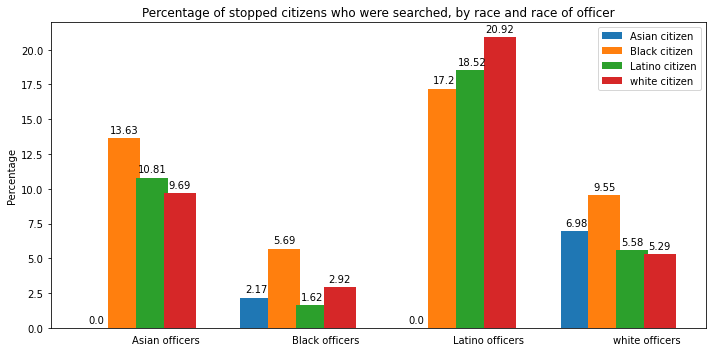

In [178]:
labels = ['Asian officers', 'Black officers', 'Latino officers', 'white officers']
Asian = [Asian_officer_pct_search[0], Black_officer_pct_search[0], Latino_officer_pct_search[0], white_officer_pct_search[0]]
Black = [Asian_officer_pct_search[1], Black_officer_pct_search[1], Latino_officer_pct_search[1], white_officer_pct_search[1]]
Latino = [Asian_officer_pct_search[2], Black_officer_pct_search[2], Latino_officer_pct_search[2], white_officer_pct_search[2]]
white = [Asian_officer_pct_search[4], Black_officer_pct_search[6], Latino_officer_pct_search[4], white_officer_pct_search[6]]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.52

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x, Asian, width, label='Asian citizen')
rects2 = ax.bar(x + spacing/3, Black, width, label='Black citizen')
rects3 = ax.bar(x + (2*spacing)/3, Latino, width, label='Latino citizen')
rects4 = ax.bar(x + spacing, white, width, label='white citizen')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of stopped citizens who were searched, by race and race of officer')
ax.set_xticks(x + .225)
ax.set_xticklabels(labels)
ax.tick_params(bottom=False)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

#fig.tight_layout(w_pad=2)
fig.tight_layout()
plt.show()

In [106]:
Asian_officer_pct_cited = (overview_3.loc['Asian', '% cited'] * 100).round(2)
Black_officer_pct_cited = (overview_3.loc['Black', '% cited'] * 100).round(2)
Latino_officer_pct_cited = (overview_3.loc['Latino', '% cited'] * 100).round(2)
white_officer_pct_cited = (overview_3.loc['white', '% cited'] * 100).round(2)

In [107]:
[Asian_officer_pct_cited[0], Black_officer_pct_cited[0], Latino_officer_pct_cited[0], white_officer_pct_cited[0]]

[0.0, 6.52, 0.0, 16.57]

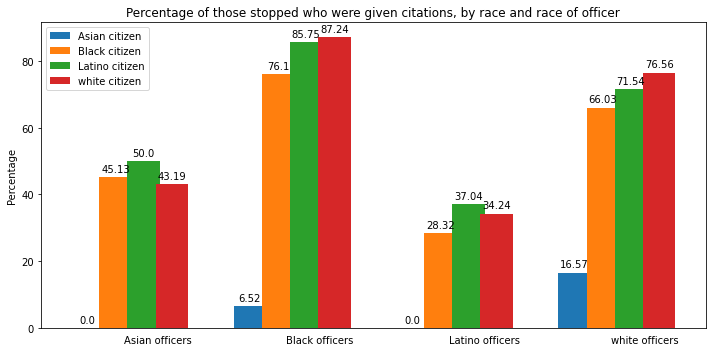

In [179]:
labels = ['Asian officers', 'Black officers', 'Latino officers', 'white officers']
Asian = [Asian_officer_pct_cited[0], Black_officer_pct_cited[0], Latino_officer_pct_cited[0], white_officer_pct_cited[0]]
Black = [Asian_officer_pct_cited[1], Black_officer_pct_cited[1], Latino_officer_pct_cited[1], white_officer_pct_cited[1]]
Latino = [Asian_officer_pct_cited[2], Black_officer_pct_cited[2], Latino_officer_pct_cited[2], white_officer_pct_cited[2]]
white = [Asian_officer_pct_cited[4], Black_officer_pct_cited[6], Latino_officer_pct_cited[4], white_officer_pct_cited[6]]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.52

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x, Asian, width, label='Asian citizen')
rects2 = ax.bar(x + spacing/3, Black, width, label='Black citizen')
rects3 = ax.bar(x + (2*spacing)/3, Latino, width, label='Latino citizen')
rects4 = ax.bar(x + spacing, white, width, label='white citizen')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of those stopped who were given citations, by race and race of officer')
ax.set_xticks(x + .225)
ax.set_xticklabels(labels)
ax.tick_params(bottom=False)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

#fig.tight_layout(w_pad=2)
fig.tight_layout()
plt.show()

In [231]:
def a_b(race):
    a = df.groupby('citizen_race').sum('searched').loc[race, 'searched']
    b = df.groupby('citizen_race').count().loc[race, 'searched']
    return stats.beta((a + 1), b - a + 1).rvs(10000)
a_b('Black')

(<scipy.stats._distn_infrastructure.rv_frozen at 0x7fd0152bff90>, 3125, 34943)

In [175]:
# (a_b('Black') > a_b('white')).mean()

1.0

### Total search & citation data for individual races of citizen

In [197]:
# all searches of Blacks, all officers
Black_searches = df.loc[(df.citizen_race == 'Black') & (df.searched.isin([0,1]))]
Black_searches = Black_searches['searched']
len(Black_searches)

34943

In [110]:
# of all citations of Blacks, all officers
Black_citations = df.loc[(df.citizen_race == 'Black') & (df.citation_issued.isin([0,1]))]
Black_citations = Black_citations['citation_issued']
len(Black_citations)

34943

In [111]:
#all searches of whites, all officers
white_searches = df.loc[(df.citizen_race == 'white') & (df.searched.isin([0,1]))]
white_searches = white_searches['searched']
len(white_searches)

69340

In [112]:
# of all citations of whites, all officers
white_citations = df.loc[(df.citizen_race == 'white') & (df.citation_issued.isin([0,1]))]
white_citations = white_citations['citation_issued']
len(white_citations)

69340

In [113]:
# all searches of Latinos, all officers
Latino_searches = df.loc[(df.citizen_race == 'Latino') & (df.searched.isin([0,1]))]
Latino_searches = Latino_searches['searched']
len(Latino_searches)

4843

In [114]:
# of all citations of Latinos, all officers
Latino_citations = df.loc[(df.citizen_race == 'Latino') & (df.citation_issued.isin([0,1]))]
Latino_citations = Latino_citations['citation_issued']
len(Latino_citations)

4843

### Total search data by race of officer

In [115]:
# all searches by white officers, all races
white_officer_searches = df.loc[(df.officer_race == 'white') & (df.searched.isin([0,1]))]
white_officer_searches = white_officer_searches['searched']

In [116]:
# all citations by white officers, all races
white_officer_citations = df.loc[(df.officer_race == 'white') & (df.citation_issued.isin([0,1]))]
white_officer_citations = white_officer_citations['citation_issued']

In [117]:
# all searches by Black officers, all races
Black_officer_searches = df.loc[(df.officer_race == 'Black') & (df.searched.isin([0,1]))]
Black_officer_searches = Black_officer_searches['searched']

In [118]:
# all citations by Black officers, all races
Black_officer_citations = df.loc[(df.officer_race == 'Black') & (df.citation_issued.isin([0,1]))]
Black_officer_citations = Black_officer_citations['citation_issued']

In [119]:
# all searches by Latino officers, all races
Latino_officer_searches = df.loc[(df.officer_race == 'Latino') & (df.searched.isin([0,1]))]
Latino_officer_searches = Latino_officer_searches['searched']

In [120]:
# all citations by Latino officers, all races
Latino_officer_citations = df.loc[(df.officer_race == 'Latino') & (df.citation_issued.isin([0,1]))]
Latino_officer_citations = Latino_officer_citations['citation_issued']

### Searches by race of officer, race of citizen

In [121]:
# searches of Black citizens by white officers
white_off_Black_cit = df.loc[(df.officer_race == 'white') & (df.citizen_race == 'Black') & (df.searched.isin([0,1]))]
white_off_Black_cit = white_off_Black_cit['searched']
len(white_off_Black_cit)

27285

In [122]:
# searches of Black citizens by Black officers
Black_off_Black_cit = df.loc[(df.officer_race == 'Black') & (df.citizen_race == 'Black') & (df.searched.isin([0,1]))]
Black_off_Black_cit = Black_off_Black_cit['searched']
len(Black_off_Black_cit)

6733

In [123]:
# searches of Black citizens by Latino officers
Latino_off_Black_cit = df.loc[(df.officer_race == 'Latino') & (df.citizen_race == 'Black') & (df.searched.isin([0,1]))]
Latino_off_Black_cit = Latino_off_Black_cit['searched']
len(Latino_off_Black_cit)

279

In [124]:
# searches of white citizens by Black officers
Black_off_white_cit = df.loc[(df.officer_race == 'Black') & (df.citizen_race == 'white') & (df.searched.isin([0,1]))]
Black_off_white_cit = Black_off_white_cit['searched']
len(Black_off_white_cit)

13663

In [125]:
# searches of white citizens by white officers
white_off_white_cit = df.loc[(df.officer_race == 'white') & (df.citizen_race == 'white') & (df.searched.isin([0,1]))]
white_off_white_cit = white_off_white_cit['searched']
len(white_off_white_cit)

54447

In [126]:
# searches of white citizens by Latino officers
Latino_off_white_cit = df.loc[(df.officer_race == 'Latino') & (df.citizen_race == 'white') & (df.searched.isin([0,1]))]
Latino_off_white_cit = Latino_off_white_cit['searched']
len(Latino_off_white_cit)

368

## Hypothesis Testing

### Plotting A/B 

In [216]:
def plot_beta(alpha, beta, ax, dist, title=None, label=None):

    x = np.linspace(0.0, 1.0, beta)
    y = dist.pdf(x)    
    
    lines = ax.plot(x, y, label=label)
    ax.fill_between(x, y, alpha=0.2, color=lines[0].get_c())
    if title: 
        ax.set_title(title)
    ax.set_ylim(0.0, np.max(y)*1.2)    

## Comparing searches of Black and white citizens, officers of all races

### Simulation

In [217]:
def a_b(race):
    a = df.groupby('citizen_race').sum('searched').loc[race, 'searched'] # alpha
    b = df.groupby('citizen_race').count().loc[race, 'searched'] # beta
    return stats.beta((a + 1), b - a + 1), a, b 
a_b('Black')
(a_b('Black')[0].rvs(10000) > a_b('white')[0].rvs(10000)).mean()

1.0

### Plotting beta distributions

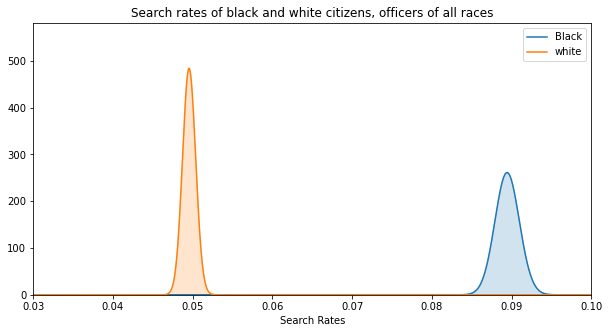

In [281]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#def plot_beta(alpha, beta, ax, dist, title=None, label=None):

Black_dist, b_alpha, b_beta = a_b('Black')
White_dist, w_alpha, w_beta = a_b('white')
plot_beta(b_alpha, b_beta, ax, Black_dist, title=title, label="Black")
plot_beta(w_alpha, w_beta, ax, White_dist, title=None, label="white")

# title, etc
ax.set_xlabel("Search Rates")
title='Search rates of black and white citizens, officers of all races'
ax.legend()
ax.set_xlim(0.03,0.1);

#### 95% credible interval of Black motorists' rate of search

## Comparing rate of searches by Latino and white officers

* Null hypothesis: Race does not play a role in the rate of searches by Latino and white officers
* Alternative hypothesis: Latino officers are more likely to conduct searches than white officers
* Alpha: .05

### Simulations

In [284]:
def a_b_officer_searches(race):
    a = df.groupby('officer_race').sum('searched').loc[race, 'searched'] # alpha
    b = df.groupby('officer_race').count().loc[race, 'searched'] # beta
    return stats.beta((a + 1), b - a + 1), a, b 

In [285]:
(a_b_officer_searches('Latino')[0].rvs(10000) > a_b_officer_searches('white')[0].rvs(10000)).mean()

1.0

### Plotting beta distributions

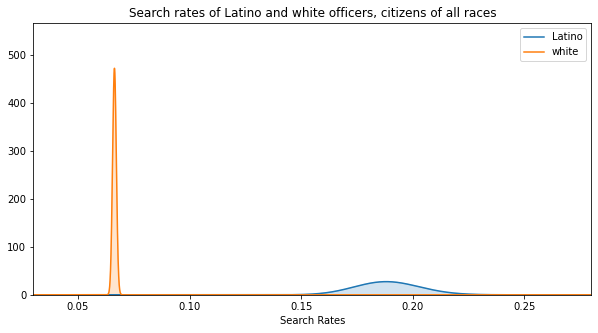

In [283]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#def plot_beta(alpha, beta, ax, dist, title=None, label=None):

Latino_dist, L_alpha, L_beta = a_b_officer_searches('Latino')
White_dist, w_alpha, w_beta = a_b_officer_searches('white')
plot_beta(b_alpha, b_beta, ax, Latino_dist, title=title, label="Latino")
plot_beta(w_alpha, w_beta, ax, White_dist, title=None, label="white")

# title, etc
ax.set_xlabel("Search Rates")
title='Search rates of Latino and white officers, citizens of all races'
ax.legend()
ax.set_xlim(0.03,0.28);

## Comparing rates of searches of Blacks citizens by white, Black officers

### Simulations

In [261]:
def a_b_Black_searches(off_race, cit_race):
    a = df.groupby(['officer_race', 'citizen_race']).sum('searched').loc[off_race, 'searched'].loc[cit_race] # alpha
    b = df.groupby(['officer_race', 'citizen_race']).count().loc[off_race, 'searched'].loc[cit_race] # beta
    return stats.beta((a + 1), b - a + 1), a, b 

In [264]:
(a_b_Black_searches('white', 'Black')[0].rvs(10000) > a_b_Black_searches('Black', 'Black')[0].rvs(10000)).mean()

1.0

### Plotting Beta distributions

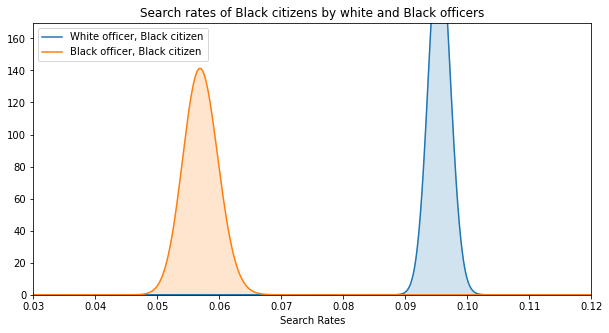

In [277]:
# searches of Blacks by white officers, Black officers 

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#def plot_beta(alpha, beta, ax, dist, title=None, label=None):

white_Black_dist, wb_alpha, wb_beta = a_b_Black_searches('white', 'Black')
Black_Black_dist, bb_alpha, bb_beta = a_b_Black_searches('Black', 'Black')
plot_beta(wb_alpha, wb_beta, ax, white_Black_dist, title=title, label="White officer, Black citizen")
plot_beta(bb_alpha, bb_beta, ax, Black_Black_dist, title=None, label="Black officer, Black citizen")

# title, etc
ax.set_xlabel("Search Rates")
title='Search rates of Black citizens by white and Black officers'
ax.legend()
ax.set_xlim(0.03,0.12);

## Comparing rates of searches of white citizens and Black citizens by Black officers

### Simulations

In [268]:
(a_b_Black_searches('Black', 'Black')[0].rvs(10000) > a_b_Black_searches('Black', 'white')[0].rvs(10000)).mean()

1.0

### Plotting beta distributions

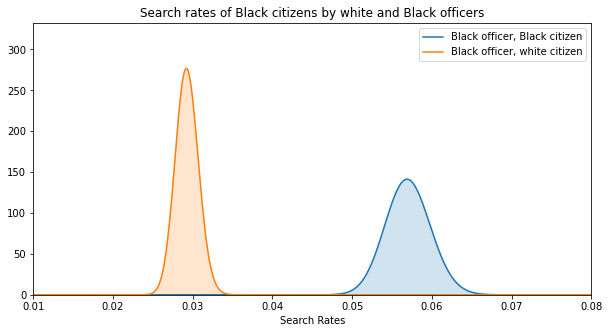

In [278]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#def plot_beta(alpha, beta, ax, dist, title=None, label=None):

Black_Black_dist, bb_alpha, bb_beta = a_b_Black_searches('Black', 'Black')
Black_white_dist, bw_alpha, bw_beta = a_b_Black_searches('Black', 'white')
plot_beta(bb_alpha, bb_beta, ax, Black_Black_dist, title=title, label="Black officer, Black citizen")
plot_beta(bw_alpha, bw_beta, ax, Black_white_dist, title=None, label="Black officer, white citizen")

# title, etc
ax.set_xlabel("Search Rates")
title='Search rates of Black citizens by white and Black officers'
ax.legend()
ax.set_xlim(0.01,0.08);